In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('AlgerianForestFiresDataRegression_cleaned.csv')

In [4]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [5]:
df.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month', 'year'], axis = 1, inplace=True)

In [7]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [8]:
## encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [9]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [10]:
## Independent And dependent feature
X = df.drop('FWI', axis =1)
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [15]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

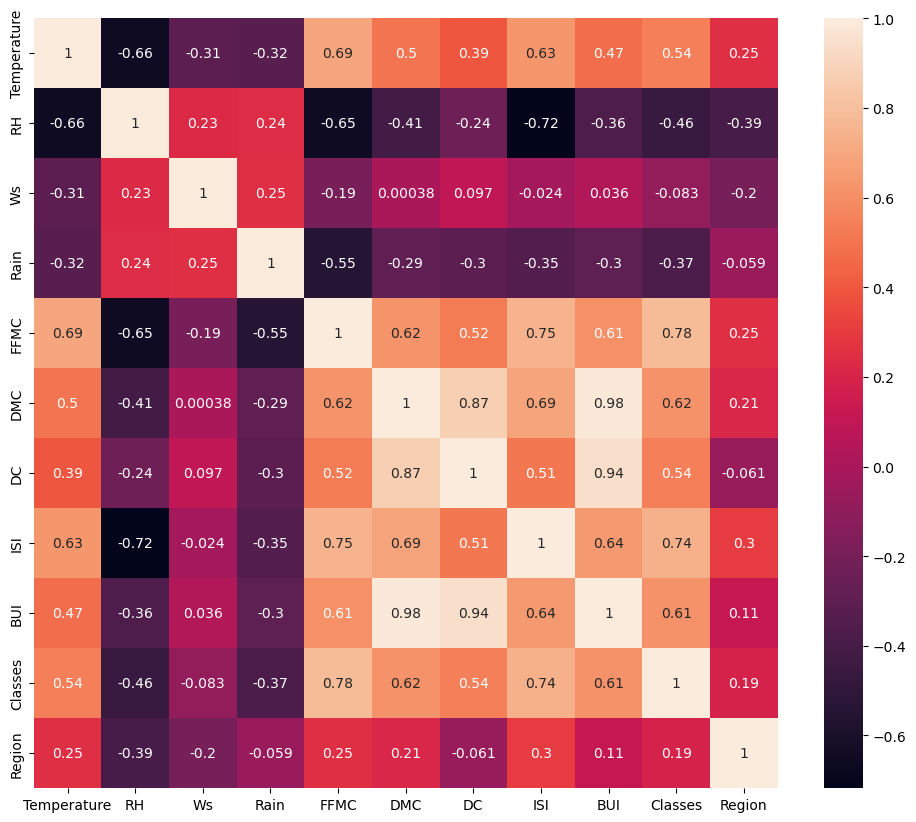

In [16]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
# threshold - Domain expertise
corr_features = correlation(X_train, 0.85)


In [19]:
# drop this features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis = 1, inplace =True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scalinf or Standardizatin

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [21]:
X_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### box plot to understand effect of Stnadard scaler

Text(0.5, 1.0, 'X_train After scaling')

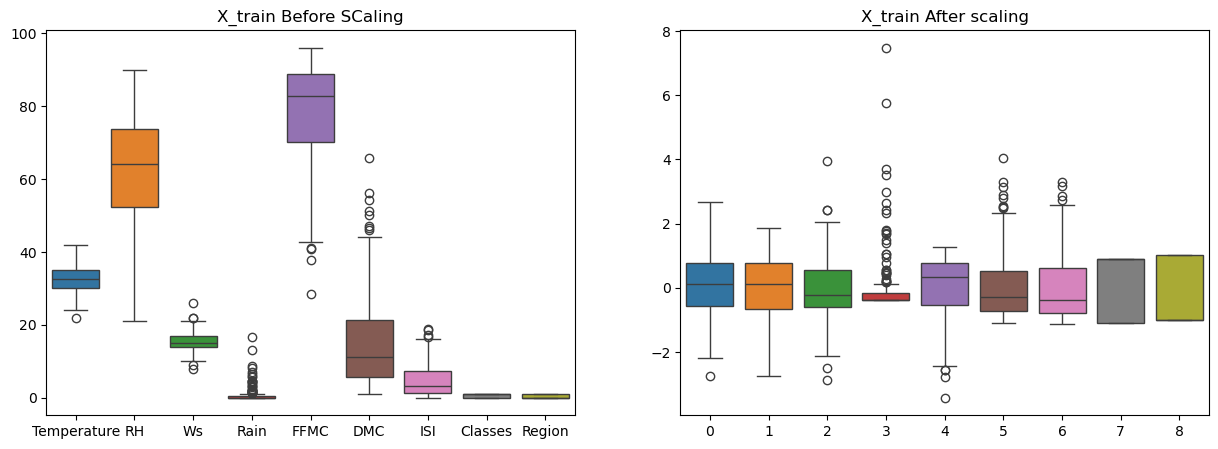

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before SCaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scale)
plt.title('X_train After scaling')

## Linear Regresssion Model

Mean asolute error 0.5468236465249987
R2 scoe 0.9847657384266951


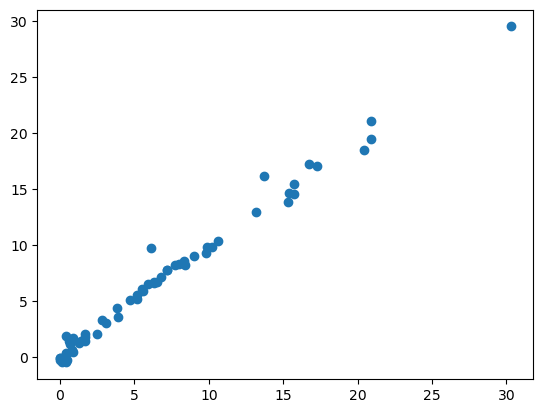

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg=LinearRegression()
linreg.fit(X_train_scale, y_train)
y_pred = linreg.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean asolute error", mae)
print("R2 scoe", score)
plt.scatter(y_test, y_pred)

## Lasso Regression

Mean asolute error 1.1331759949144085
R2 scoe 0.9492020263112388


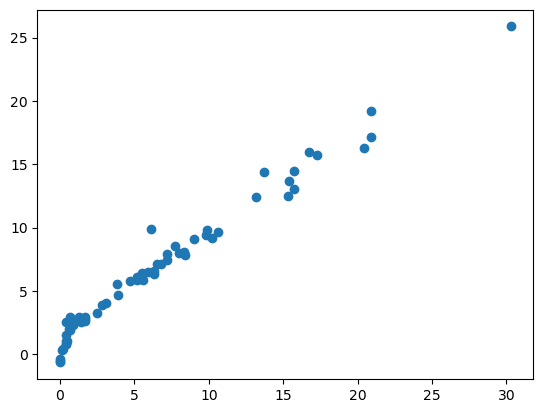

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
Lasso=Lasso()
Lasso.fit(X_train_scale, y_train)
y_pred = Lasso.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean asolute error", mae)
print("R2 scoe", score)
plt.scatter(y_test, y_pred)

## Ridge Regression

Mean asolute error 0.5642305340105713
R2 scoe 0.9842993364555512


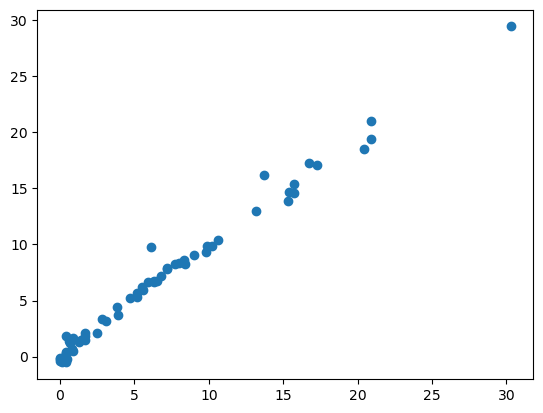

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
Ridge=Ridge()
Ridge.fit(X_train_scale, y_train)
y_pred = Ridge.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean asolute error", mae)
print("R2 scoe", score)
plt.scatter(y_test, y_pred)

## Elastic net regression

Mean asolute error 1.8822353634896
R2 scoe 0.8753460589519703


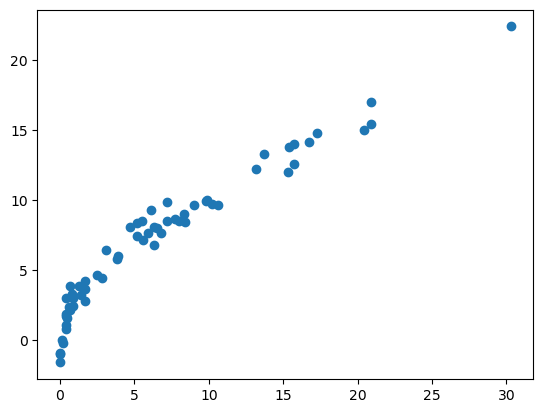

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_scale, y_train)
y_pred = ElasticNet.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean asolute error", mae)
print("R2 scoe", score)
plt.scatter(y_test, y_pred)

## Cross validation using LasooCV

In [27]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scale, y_train)

LassoCV(cv=5)

In [28]:
lassoCV.predict(X_train_scale)

array([ 1.12352400e+00, -4.32008727e-01,  2.18421021e+01,  3.39660772e+00,
        1.74184330e+00,  9.66005015e+00,  6.96880373e+00,  1.02965405e+01,
       -7.78961756e-01,  8.06547464e+00,  1.24207104e+01,  1.51136178e+01,
        1.22695720e+01, -2.81803691e-01,  1.40985530e+00,  1.65178975e-01,
        3.00233768e+00,  1.36917427e+01, -1.12261821e+00,  9.64073506e+00,
        5.61660850e+00,  6.73146518e+00,  9.80084592e+00,  2.89949749e+01,
        9.78803392e-01, -1.01201311e-01,  9.52578662e-01,  7.11324647e+00,
        5.34530092e+00,  3.69725221e+00, -3.86941888e-01,  9.86118836e-01,
        1.94897513e+00,  4.51170472e+00,  6.74026227e-02, -2.40791383e-01,
        1.94828224e+01,  4.42057726e+00,  1.70403944e+00,  1.40427388e+01,
        1.19717469e+01,  1.42000219e+01,  1.51148657e+00,  1.41124158e+01,
        1.24618626e+01,  3.59010918e+00,  5.66260658e-01,  2.49982708e+01,
        4.60080910e-01, -3.87608783e-01,  1.30608252e+01,  4.13565611e+00,
       -3.09162774e-01,  

In [29]:
lassoCV.alpha_

0.05725391318234405

In [30]:
lassoCV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean asolute error 0.6199701158263433
R2 scoe 0.9820946715928275


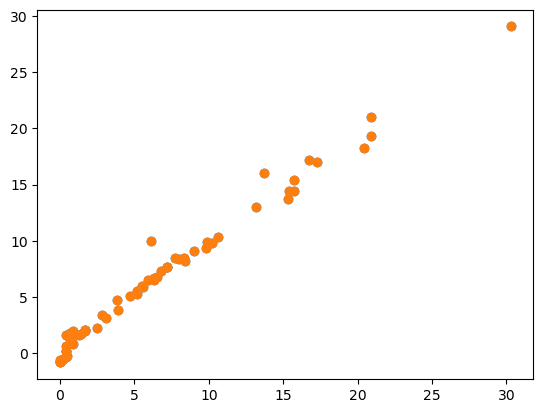

In [31]:
y_pred = lassoCV.predict(X_test_scale)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean asolute error", mae)
print("R2 scoe", score)
plt.scatter(y_test, y_pred)

# Ridge CV

Mean asolute error 0.5642305340105713
R2 scoe 0.9842993364555512


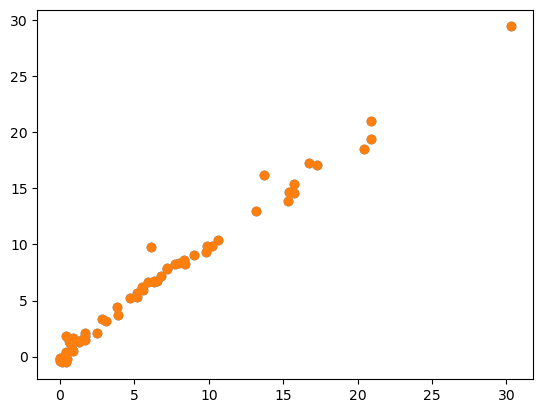

In [32]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scale, y_train)
y_pred = ridgecv.predict(X_test_scale)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean asolute error", mae)
print("R2 scoe", score)
plt.scatter(y_test, y_pred)

In [35]:
# save ML model
import pickle 
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridgecv, open('ridge.pkl', 'wb'))